# Klasifikasi Multi Kelas

Pada pembahasan kali ini, kita akan membahas bagaimana cara melakukan klasifikasi multi kelas. Kita akan menggenerate dataset dengan `make_blobs` dari `sklearn.datasets`. Untuk itu, kita akan mengimpor beberapa hal terlebih dahulu.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Kode di atas mengimport beberapa library yang digunakan dalam modul ini ini.
- Library `torch` dan `torch.nn` digunakan untuk membuat dan mengeksekusi model deep learning.
- Library `matplotlib.pyplot` digunakan untuk membuat visualisasi data, seperti plot.
- Library `sklearn.datasets` digunakan untuk membuat dataset sintetis dengan fungsi make_blobs dan
- library `sklearn.model_selection` digunakan untuk membagi dataset menjadi data latih dan data uji dengan fungsi train_test_split.

Setelah itu, kita akan menggunakan helper function seperti yang ada pada modul sebelumnya. Helper function ini berfungsi untuk membuat plot dari data dan model yang kita buat.

In [2]:
# mengunduh helper function jika belum ada

import requests
from pathlib import Path

if Path("helper_function.py").is_file():
    print("helper_function.py sudah ada")
else:
    print("Mengunduh helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mctosima/belajarpytorch/main/docs/helper_function.py")
    with open("helper_function.py", "wb") as f:
        f.write(request.content)

try:
    from helper_function import plot_decision_boundary, plot_predictions
except:
    print("Gagal mengunduh helper_function.py")

helper_function.py sudah ada


## Memuat dataset

Pertama-tama, kita akna mendefinisikan beberapa konstanta yang akan digunakan dalam pembuatan dataset.

In [3]:
# mengatur hyperparameter untuk generate data
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 2023

**Penjelasan:**
- `NUM_CLASSES` adalah jumlah kelas yang akan digunakan dalam dataset.
- `NUM_FEATURES` adalah jumlah fitur yang akan digunakan dalam dataset.
- `RANDOM_SEED` adalah nilai random seed yang akan digunakan untuk menggenerate dataset.

In [4]:
# membuat multi-class data
X, y = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    random_state=RANDOM_SEED,
    cluster_std=1.5,
)

```

**Penjelasan:**
`make_blobs` adalah fungsi yang digunakan untuk membuat dataset sintetis dengan jumlah kelas yang ditentukan. Fungsi ini akan mengembalikan dua buah nilai, yaitu `X` dan `y`. `X` adalah data yang akan digunakan untuk latih model, sedangkan `y` adalah label dari data tersebut.

Selanjutnya kita akan mengenerate variabel X (data) dan y (label) dengan menggunakan fungsi `make_blobs` dari `sklearn.datasets`.

In [5]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

# mencoba print
print(f"5 Input pertama: {X[:5]}")
print(f"5 Label pertama: {y[:5]}")

5 Input pertama: tensor([[ -5.8207,  -3.6172],
        [  0.7053,  -9.7802],
        [ -9.9912,   1.6056],
        [-11.1508,   2.9350],
        [ -9.3189,   3.6023]])
5 Label pertama: tensor([2, 1, 3, 3, 3])


Selanjutnya, kita akan membagi dataset menjadi data latih dan data uji dengan menggunakan fungsi `train_test_split` dari `sklearn.model_selection`. Fungsi ini akan mengembalikan empat buah nilai, yaitu `X_train`, `X_test`, `y_train`, dan `y_test`. `X_train` dan `y_train` adalah data latih yang akan digunakan untuk melatih model, sedangkan `X_test` dan `y_test` adalah data uji yang akan digunakan untuk menguji model.

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)

Mari kita lihat sebaran data yang kita punya dengan menggunakan `plt.scatter` dari `matplotlib.pyplot`.

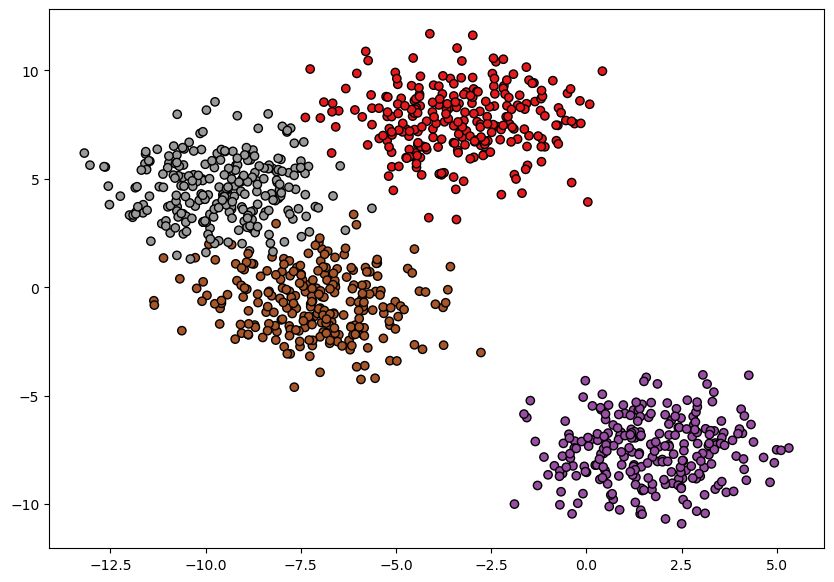

In [7]:
# plot data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")

## Membuat model

Selanjutnya, kita akan membuat model deep learning. Namun sebelum itu, kita akan mengecek device yang akan digunakan untuk melakukan training. Kode di bawah ini digunakan untuk mengecek apakah komputer yang digunakan memiliki GPU atau tidak. Juga akan dicek apakah komputer merupakan 'Apple Silicon' atau bukan. Jika komputer memiliki GPU dan bukan merupakan 'Apple Silicon', maka device yang digunakan adalah GPU. Jika komputer tidak memiliki GPU atau merupakan 'Apple Silicon', maka device yang digunakan adalah CPU.

In [8]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Tersedia GPU")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Tersedia MPS Apple Silicon")
else:
    device = torch.device("cpu")
    print("Tersedia CPU")

Tersedia MPS Apple Silicon


Selanjutnya kita akan membuat model deep learning dengan `nn.Module`

In [9]:
class MulticlassModel(nn.Module):
    def __init__(
        self,
        input_features,
        output_features,
        hidden_units=16,
    ):
        super().__init__()
        

        # membuat layer
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.Linear(hidden_units, hidden_units),
            nn.Linear(hidden_units, output_features),
        )

    def forward(self, x):
        output = self.linear_layer_stack(x)
        return output

**Penjelasan:**
- `input_features` adalah jumlah fitur yang akan digunakan sebagai input.
- `output_features` adalah jumlah kelas yang akan digunakan sebagai output.
- `hidden_units` adalah jumlah unit yang akan digunakan pada hidden layer.
- `nn.Sequential` adalah fungsi yang digunakan untuk membuat model deep learning dengan cara menumpuk layer-layer yang kita inginkan.
- `nn.Sequential` terdiri dari tiga buah `nn.Linear`
- `nn.Linear` adalah fungsi yang digunakan untuk membuat layer linear. `nn.Linear` memiliki dua buah parameter, yaitu `input_features` dan `output_features`.
- `def forward` adalah fungsi yang digunakan untuk melakukan forward propagation. Fungsi ini akan mengembalikan nilai output dari model deep learning.

Setelah itu, kita instansiasi model yang telah kita buat

In [10]:
model_multiclass = MulticlassModel(
    input_features=NUM_FEATURES,
    output_features=NUM_CLASSES,
    hidden_units=16,
)

model_multiclass.to(device)

MulticlassModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=4, bias=True)
  )
)

## Training

Tahap selanjutnya, kita akan melakukan training. Namun, sebelumnya kita akan membuat fungsi untuk mengukur akurasi

In [11]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

Setelah itu, kita menentukan loss function dan optimizer. Dalam hal ini, fungsi loss yang kita gunakan adalah `CrossEntropyLoss` dan optimizer yang digunakan adalah `SGD`.

In [12]:
# menentukan loss function dan optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_multiclass.parameters(), lr=0.01)

Selanjutnya kita definisikan `manual_seed`, dan `epoch`. Buat kamu yang lupa, `manual_seed` adalah nilai random seed yang akan digunakan untuk menggenerate nilai random, sehingga setiap kali kamu menjalankan kode, hasil yang didapat akan konsisten sama.

Kita juga memindahkan dataset train dan test ke device

In [13]:
torch.manual_seed(RANDOM_SEED)
epochs = 100

# memindahkan data ke device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

Berikut ini adalah training loop yang kita gunakan. Penjelasannya ada di bagian bawah kode.

In [14]:
for epoch in range(epochs):
    model_multiclass.train()

    # forward pass
    y_logits = model_multiclass(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # validation
    model_multiclass.eval()
    with torch.inference_mode():
        y_test_logits = model_multiclass(X_test)
        y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
        val_loss = loss_fn(y_test_logits, y_test)
        val_acc = accuracy_fn(y_test, y_test_pred)


    if epoch % 10 == 0:
        print(
            f"Epoch: {epoch:03d}, Loss: {loss:.4f}, Accuracy: {acc:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%"
        )


Epoch: 000, Loss: 1.1736, Accuracy: 16.25%, Val Loss: 0.9181, Val Accuracy: 28.50%
Epoch: 010, Loss: 0.4520, Accuracy: 93.38%, Val Loss: 0.4383, Val Accuracy: 98.50%
Epoch: 020, Loss: 0.3512, Accuracy: 95.88%, Val Loss: 0.3413, Val Accuracy: 98.50%
Epoch: 030, Loss: 0.2988, Accuracy: 96.25%, Val Loss: 0.2877, Val Accuracy: 99.00%
Epoch: 040, Loss: 0.2637, Accuracy: 96.25%, Val Loss: 0.2510, Val Accuracy: 99.00%
Epoch: 050, Loss: 0.2378, Accuracy: 96.25%, Val Loss: 0.2236, Val Accuracy: 99.00%
Epoch: 060, Loss: 0.2177, Accuracy: 96.38%, Val Loss: 0.2022, Val Accuracy: 99.00%
Epoch: 070, Loss: 0.2016, Accuracy: 96.50%, Val Loss: 0.1851, Val Accuracy: 99.00%
Epoch: 080, Loss: 0.1885, Accuracy: 96.50%, Val Loss: 0.1710, Val Accuracy: 98.50%
Epoch: 090, Loss: 0.1775, Accuracy: 96.50%, Val Loss: 0.1593, Val Accuracy: 98.50%


**Penjelasan:**
- `model_multiclass.train()` digunakan untuk mengubah mode model menjadi training mode.
- `y_logits = model_multiclass(X_train)` digunakan untuk melakukan forward propagation pada data latih.
- `y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)` digunakan untuk mengambil nilai prediksi dari model.
- `loss = loss_fn(y_logits, y_train)` digunakan untuk menghitung loss dari model.
- `acc = accuracy_fn(y_train, y_pred)` digunakan untuk menghitung akurasi dari model.

Bagi kamu yang lupa terkait **backward pass**, kami coba jelaskan lagi. Backward pass adalah proses dimana kita menghitung nilai gradient dari loss function terhadap parameter-parameter yang ada pada model. Nilai gradient ini nantinya akan digunakan untuk melakukan update parameter pada model. Untuk melakukan backward pass, kita perlu melakukan `loss.backward()`. Namun, sebelum melakukan backward pass, kita perlu melakukan `optimizer.zero_grad()` untuk menghapus nilai gradient yang ada pada parameter-parameter yang ada pada model. Jika tidak dilakukan, nilai gradient yang ada pada parameter-parameter akan terus bertambah setiap kali kita melakukan backward pass. Setelah itu barulah kita dapat melakukan `optimizer.step()` yang bertujuan untuk melakukan update parameter pada model.


## Prediksi

Selanjutnya kita akan melakukan prediksi atau inferensi

In [15]:
# melakukan prediksi
model_multiclass.eval()
with torch.inference_mode():
    y_test_logits = model_multiclass(X_test)

- `model_multiclass.eval()` digunakan untuk mengubah mode model menjadi evaluation mode.
- `with torch.inference_mode():` digunakan untuk mengubah mode model menjadi inference mode. Hal ini dilakukan agar model tidak melakukan update parameter pada model. Karena kita melakukan testing, bukan training, sehingga kita tidak perlu melakukan update parameter pada model.

Selanjutnya kita akan coba melakukan plot untuk melihat `decision_boundary` atau batas keputusan dari model yang kita buat. Kita akan menggunakan `plot_decision_boundary` yang telah disediakan pada helper function

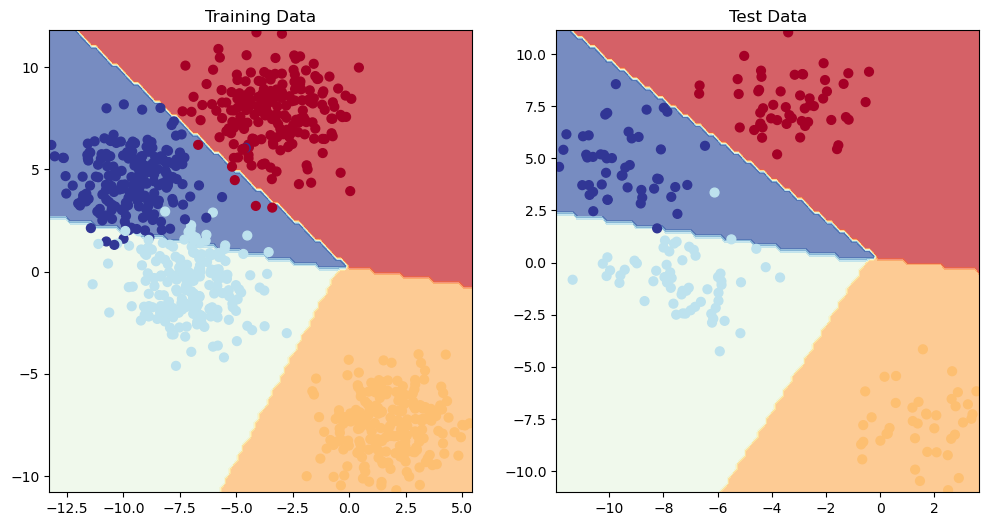

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training Data")
plot_decision_boundary(model_multiclass, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test Data")
plot_decision_boundary(model_multiclass, X_test, y_test)